
Evaluation metrics:
relative_humidity_2m (%): RMSE = 3.93, MAE = 3.10
surface_pressure (hPa): RMSE = 0.67, MAE = 0.55
wind_speed_10m (km/h): RMSE = 1.19, MAE = 0.91
cloud_cover (%): RMSE = 19.45, MAE = 12.72
precipitation_probability (%): RMSE = 2.65, MAE = 1.43
temperature_2m (°C): RMSE = 1.06, MAE = 0.80

Current weather stats:
relative_humidity_2m (%)           86.0
surface_pressure (hPa)           1008.5
wind_speed_10m (km/h)               4.9
cloud_cover (%)                   100.0
precipitation_probability (%)      15.0
temperature_2m (°C)                24.3
Name: 2025-04-23 23:00:00, dtype: float64


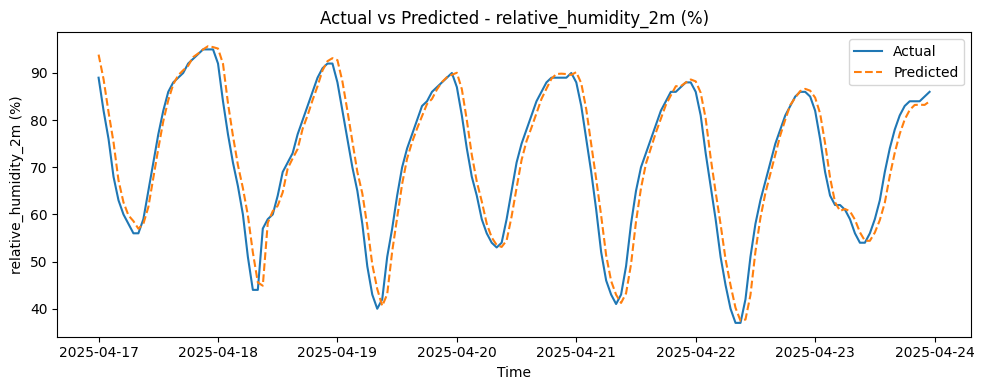

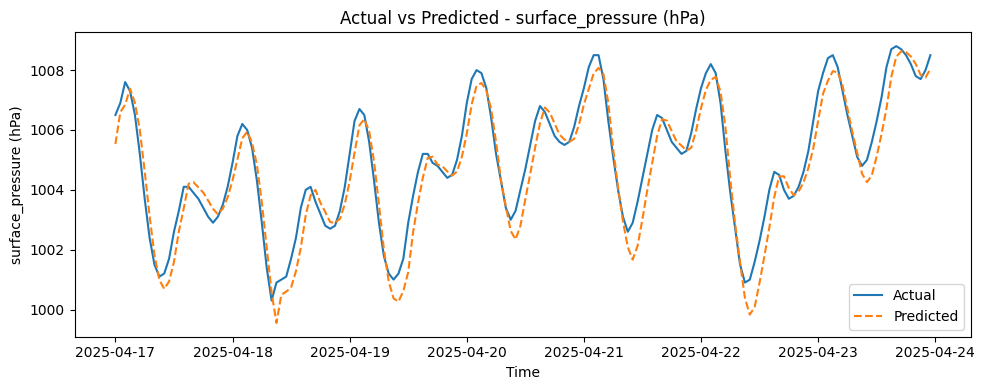

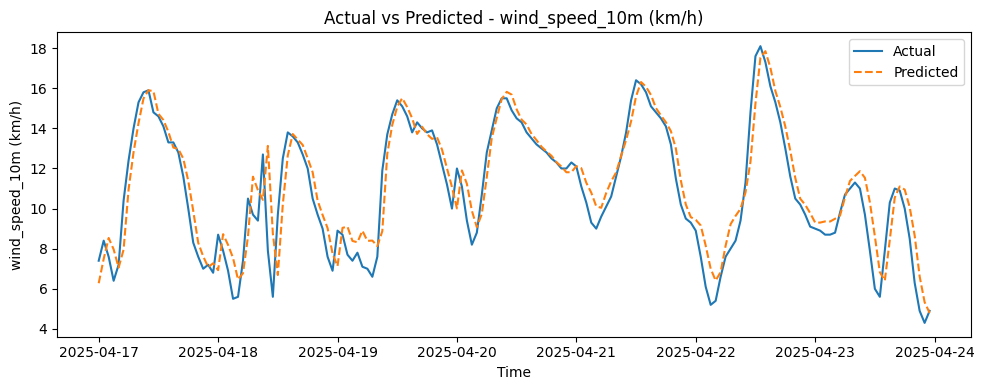

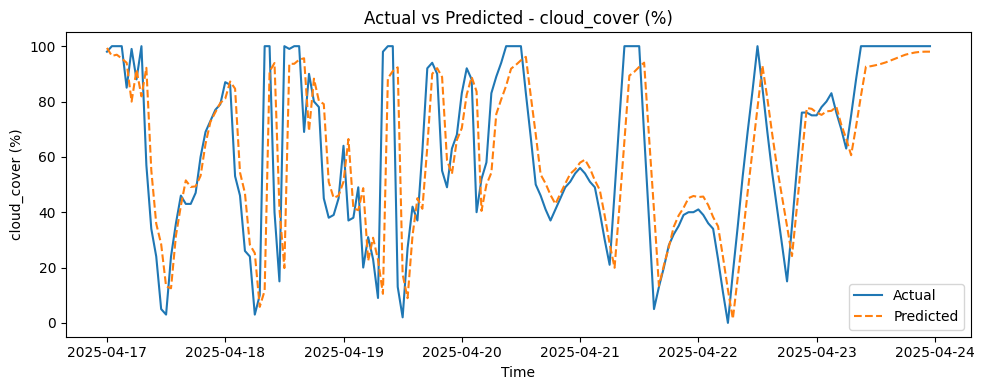

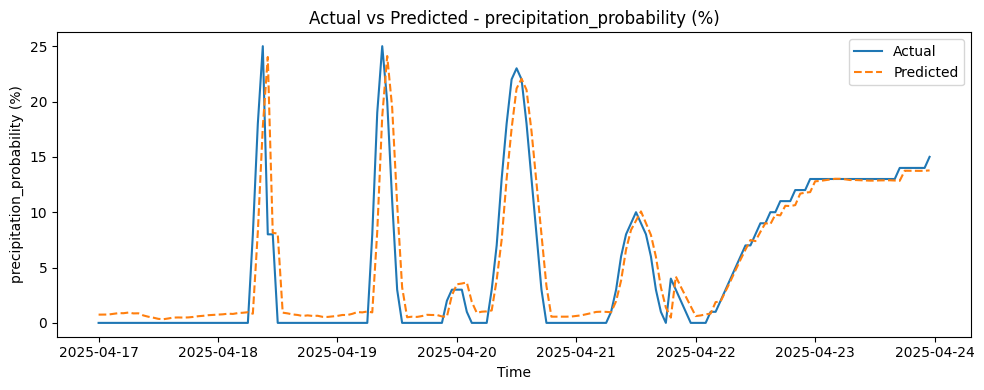

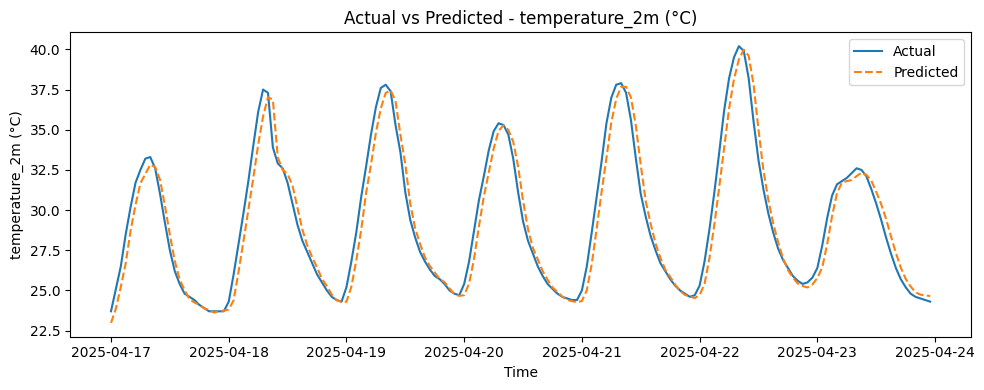

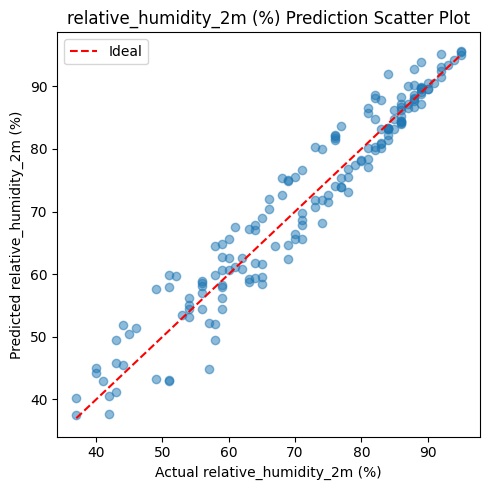

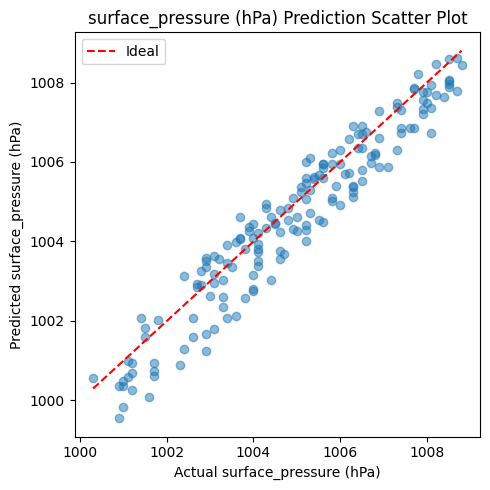

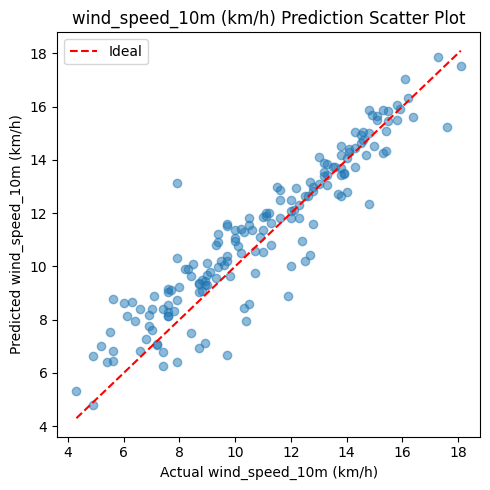

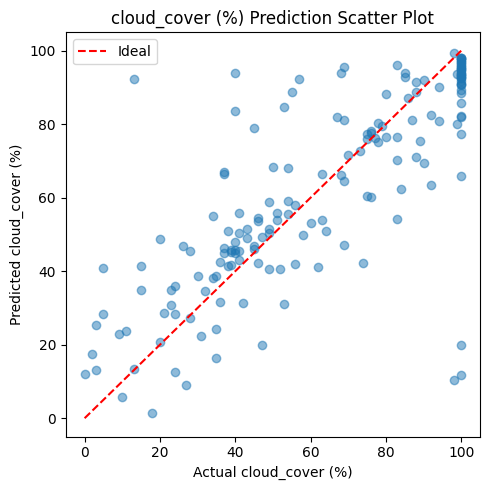

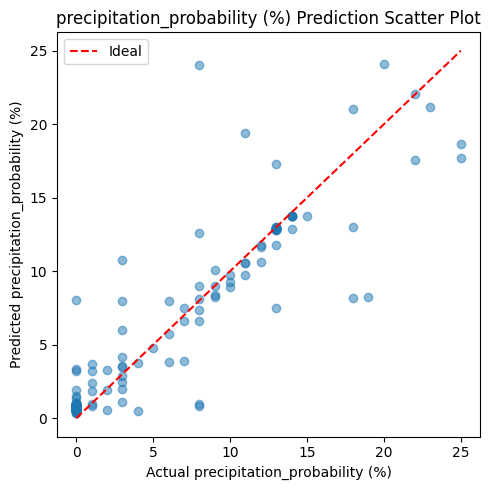

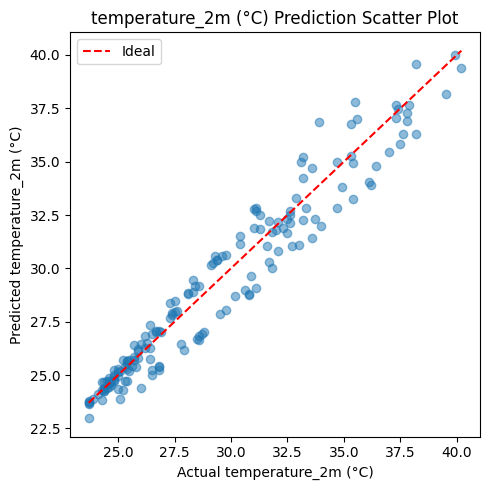

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv(
    'open-meteo-21.00N105.88E10m.csv',
    skiprows=2,
    parse_dates=['time']
)
df.set_index('time', inplace=True)

# 2. Define features and target
features = [
    'relative_humidity_2m (%)',
    'surface_pressure (hPa)',
    'wind_speed_10m (km/h)',
    'cloud_cover (%)',
    'precipitation_probability (%)',
    'temperature_2m (°C)'  # add this so we can predict all at once
]

# 3. Create lagged features
X_lag = df[features].shift(1).dropna()
Y = df[features].loc[X_lag.index]  # we now predict all stats

# 4. Split into train/test
split_date = '2025-04-17'
train_mask = X_lag.index < split_date
X_train, Y_train = X_lag[train_mask], Y[train_mask]
X_test, Y_test   = X_lag[~train_mask], Y[~train_mask]

# 5. Train model for each target stat
models = {}
predictions = pd.DataFrame(index=Y_test.index)

for col in features:
    model = LinearRegression()
    model.fit(X_train, Y_train[col])
    models[col] = model
    predictions[col] = model.predict(X_test)

# 6. Evaluate
print("\nEvaluation metrics:")
for col in features:
    rmse = np.sqrt(mean_squared_error(Y_test[col], predictions[col]))
    mae = mean_absolute_error(Y_test[col], predictions[col])
    print(f"{col}: RMSE = {rmse:.2f}, MAE = {mae:.2f}")

# 7. Show current weather
current = df.iloc[-1][features]
print("\nCurrent weather stats:")
print(current)

# 8. Plot actual vs predicted for each stat
for col in features:
    plt.figure(figsize=(10, 4))
    plt.plot(Y_test.index, Y_test[col], label='Actual', linewidth=1.5)
    plt.plot(predictions.index, predictions[col], label='Predicted', linestyle='--')
    plt.title(f'Actual vs Predicted - {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 9. Scatter plots
for col in features:
    plt.figure(figsize=(5, 5))
    plt.scatter(Y_test[col], predictions[col], alpha=0.5)
    plt.plot([Y_test[col].min(), Y_test[col].max()],
             [Y_test[col].min(), Y_test[col].max()], 'r--', label='Ideal')
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'{col} Prediction Scatter Plot')
    plt.legend()
    plt.tight_layout()
    plt.show()


Forecast from 2025-04-17 16:00:00 to 2025-04-18 07:00:00:

Time: 2025-04-17 16:00:00
  relative_humidity_2m (%): Actual = 89.00, Predicted = 89.51
  surface_pressure (hPa): Actual = 1003.90, Predicted = 1004.25
  wind_speed_10m (km/h): Actual = 12.80, Predicted = 12.97
  cloud_cover (%): Actual = 43.00, Predicted = 51.50
  precipitation_probability (%): Actual = 0.00, Predicted = 0.49
  temperature_2m (°C): Actual = 24.60, Predicted = 24.44

Time: 2025-04-17 17:00:00
  relative_humidity_2m (%): Actual = 90.00, Predicted = 90.58
  surface_pressure (hPa): Actual = 1003.70, Predicted = 1004.08
  wind_speed_10m (km/h): Actual = 11.60, Predicted = 12.49
  cloud_cover (%): Actual = 43.00, Predicted = 49.12
  precipitation_probability (%): Actual = 0.00, Predicted = 0.48
  temperature_2m (°C): Actual = 24.40, Predicted = 24.25

Time: 2025-04-17 18:00:00
  relative_humidity_2m (%): Actual = 92.00, Predicted = 91.53
  surface_pressure (hPa): Actual = 1003.40, Predicted = 1003.91
  wind_speed_1

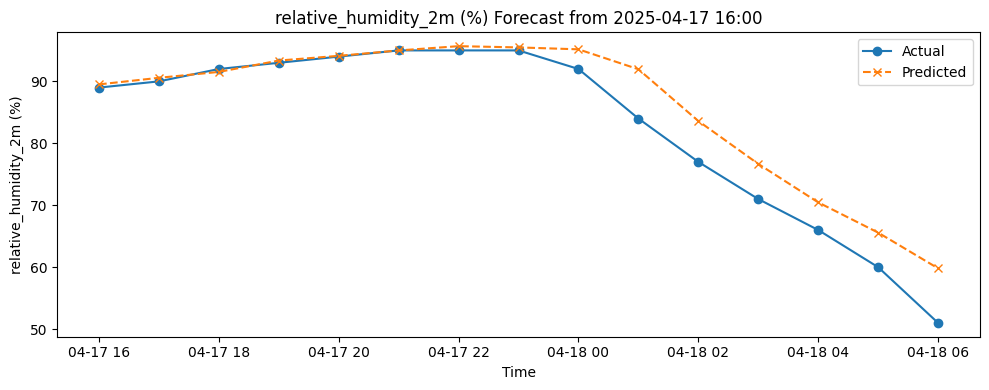

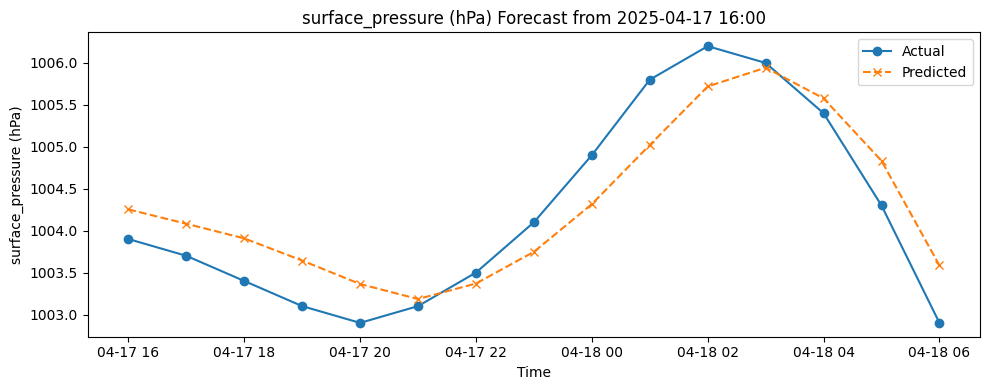

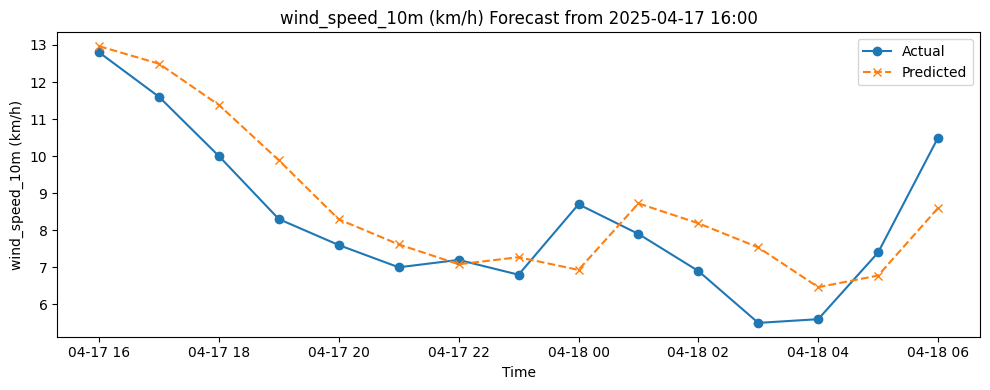

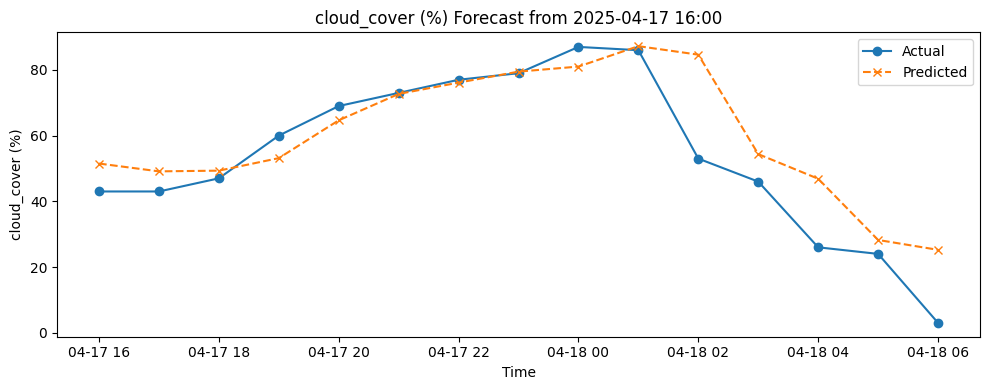

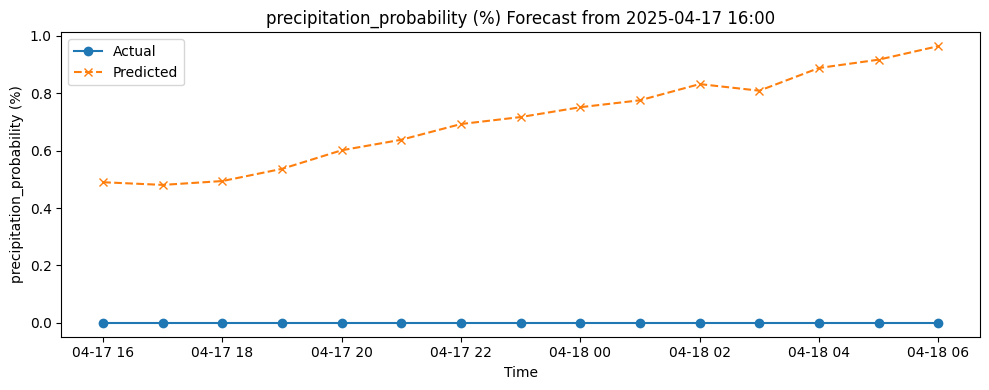

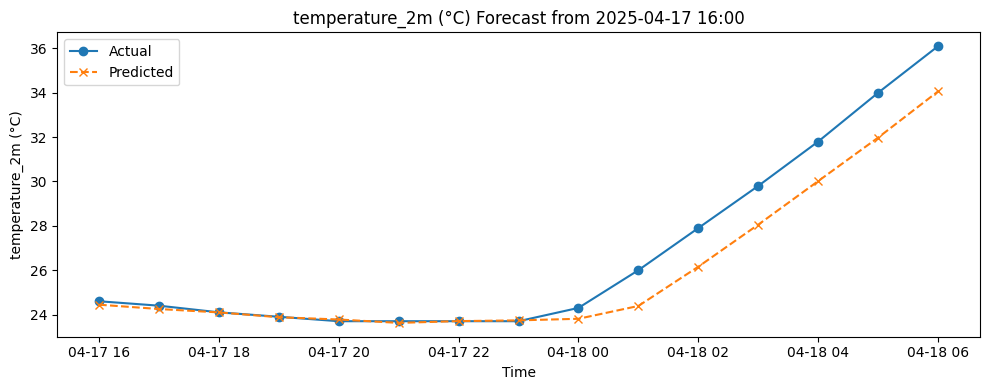

In [ ]:
# Pick the hour you want to predict (change this!)
chosen_hour = pd.to_datetime("2025-04-17 16:00")

# Number of hours to show (e.g., 6 = show from chosen_hour to +6 hours)
hours_to_show = 15

# Filter the test set for the selected hour range
selected_range = (predictions.index >= chosen_hour) & (predictions.index < chosen_hour + pd.Timedelta(hours=hours_to_show))
selected_actual = Y_test.loc[selected_range]
selected_pred = predictions.loc[selected_range]

print(f"\nForecast from {chosen_hour} to {chosen_hour + pd.Timedelta(hours=hours_to_show)}:")
for timestamp in selected_pred.index:
    print(f"\nTime: {timestamp}")
    for col in features:
        actual_val = selected_actual.loc[timestamp, col]
        predicted_val = selected_pred.loc[timestamp, col]
        print(f"  {col}: Actual = {actual_val:.2f}, Predicted = {predicted_val:.2f}")

# Optional: plot for the selected hours
for col in features:
    plt.figure(figsize=(10, 4))
    plt.plot(selected_actual.index, selected_actual[col], label='Actual', marker='o')
    plt.plot(selected_pred.index, selected_pred[col], label='Predicted', linestyle='--', marker='x')
    plt.title(f'{col} Forecast from {chosen_hour.strftime("%Y-%m-%d %H:%M")}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
chosen_hour = pd.to_datetime("2025-04-20 00:00")

# Show prediction only for that hour
print(f"\nPredicted weather at {chosen_hour}:")
if chosen_hour in predictions.index:
    for col in features:
        predicted_val = predictions.loc[chosen_hour, col]
        print(f"  {col}: Predicted = {predicted_val:.2f}")
else:
    print("  [!] Chosen hour is outside of prediction range.")


Predicted weather at 2025-04-20 00:00:00:
  relative_humidity_2m (%): Predicted = 90.05
  surface_pressure (hPa): Predicted = 1005.88
  wind_speed_10m (km/h): Predicted = 10.01
  cloud_cover (%): Predicted = 70.35
  precipitation_probability (%): Predicted = 3.49
  temperature_2m (°C): Predicted = 24.70
